## Get Price Information of Asset

In [2]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yahoo_fin.stock_info as yf_info
from tqdm import tqdm

In [3]:
dow_list = yf_info.tickers_dow()
nasdaq_list = yf_info.tickers_nasdaq()
sp500_list = yf_info.tickers_sp500()

In [4]:
tickers = dow_list

In [5]:
all_data = {}
for ticker in tqdm(tickers):
    all_data[ticker] = pdr.DataReader(ticker, 'yahoo', start = '2000-01-01')['Adj Close']

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:33<00:00,  3.11s/it]


In [6]:
dow_price = pd.DataFrame(all_data)
dow_price.pct_change()
#dow_price.rolling(window=20).mean().tail()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.088754,0.047867,-0.054135,-0.030166,0.033201,NaN,0.008751,-0.034632,0.021367,NaN,...,0.006512,-0.001606,-0.029004,-0.021677,-0.020408,0.011765,NaN,-0.026396,-0.023504,-0.033454
2000-01-04,-0.084310,-0.076465,-0.037759,-0.001555,-0.012854,NaN,-0.056102,0.000000,0.058577,NaN,...,-0.035120,-0.033780,-0.054546,-0.019242,-0.013258,-0.012791,NaN,-0.032325,-0.037199,-0.037418
2000-01-05,0.014633,0.034408,-0.025399,0.062305,0.023437,NaN,-0.003064,0.017937,0.041502,NaN,...,0.039272,0.010544,0.057692,-0.019025,-0.007678,-0.002355,NaN,0.033405,0.011364,-0.020408
2000-01-06,-0.086538,0.016632,0.020373,0.010264,0.050891,NaN,-0.016595,0.042585,-0.039848,NaN,...,0.008295,-0.033498,-0.005195,0.046061,0.019343,0.036599,NaN,-0.005079,-0.029214,0.010913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,-0.002722,-0.000813,0.004934,-0.000397,-0.003014,-0.007648,0.001091,0.022426,-0.005458,0.003418,...,-0.015987,0.000000,0.004149,-0.004146,0.000572,0.009291,-0.001214,-0.012245,-0.009822,0.003016
2021-10-11,-0.000630,-0.010768,-0.009649,0.000265,-0.011632,0.004661,-0.002723,-0.008515,-0.018219,-0.008176,...,-0.008682,-0.002103,-0.014428,0.004163,-0.006992,-0.008495,-0.022408,-0.019910,0.000844,-0.000931
2021-10-12,-0.009103,-0.023270,0.008359,-0.012718,-0.015397,0.019178,-0.011833,0.000187,-0.002248,-0.008415,...,-0.004254,-0.004588,0.020429,-0.001476,0.001600,-0.004321,-0.004709,-0.016290,0.000000,-0.001075


## Get "30yr & 5yr Treasury Yield" from "FRED"

In [10]:
Treasury_Note_30y = pdr.DataReader('DGS30', 'fred', start = '2000-01-01')
Treasury_Note_5y = pdr.DataReader('DGS5', 'fred', start = '2000-01-01')
Treasury_Note_30y_5y_spread = pd.concat([Treasury_Note_30y, Treasury_Note_5y], axis = 1)
Treasury_Note_30y_5y_spread['DGS30 - DGS5'] = Treasury_Note_30y_5y_spread['DGS30'] - Treasury_Note_30y_5y_spread['DGS5']
Treasury_Note_30y_5y_spread

,DGS30,DGS5,DGS30 - DGS5
DATE,,,
2000-01-03,6.61,6.50,0.11
2000-01-04,6.53,6.40,0.13
2000-01-05,6.64,6.51,0.13
2000-01-06,6.58,6.46,0.12
2000-01-07,6.55,6.42,0.13
...,...,...,...
2021-10-07,2.13,1.02,1.11
2021-10-08,2.16,1.05,1.11
2021-10-11,NaN,NaN,NaN


## Get "10yr & 2yr Treasury Yield" from "FRED"

In [48]:
Treasury_Note_10y = pdr.DataReader('DGS10', 'fred', start = '2000-01-01')
Treasury_Note_2y = pdr.DataReader('DGS2', 'fred', start = '2000-01-01')
Treasury_Note_10y_2y_spread = pd.concat([Treasury_Note_10y, Treasury_Note_2y], axis = 1)
Treasury_Note_10y_2y_spread['DGS10 - DGS2'] = Treasury_Note_10y_2y_spread['DGS10'] - Treasury_Note_10y_2y_spread['DGS2']
Treasury_Note_10y_2y_spread

,DGS10,DGS2,DGS10 - DGS2
DATE,,,
2000-01-03,6.58,6.38,0.20
2000-01-04,6.49,6.30,0.19
2000-01-05,6.62,6.38,0.24
2000-01-06,6.57,6.35,0.22
2000-01-07,6.52,6.31,0.21
...,...,...,...
2021-10-07,1.58,0.32,1.26
2021-10-08,1.61,0.32,1.29
2021-10-11,NaN,NaN,NaN


## Calculate Correlation between "Stock Price" and "30-5yr Treasury Note Yield Spread"

In [11]:
df = pd.concat([Treasury_Note_30y_5y_spread['DGS30 - DGS5'], dow_price], axis = 1)
df_corr = df.pct_change()['DGS30 - DGS5'].rolling(window = 20, axis=0).corr(df.pct_change().rolling(window = 20, axis=0))

In [12]:
df_corr.dropna()

,DGS30 - DGS5,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2019-04-17,1.0,-0.290759,-0.209502,-0.394691,-0.370100,-0.394596,-0.168978,-0.371503,0.224836,-0.367618,...,-0.170055,-0.200056,-0.387980,-0.241328,-0.517786,-0.001212,-0.248196,0.277931,-0.420870,-0.143174
2019-04-18,1.0,-0.214270,-0.126677,-0.374781,-0.408765,-0.396852,-0.117439,-0.334140,0.272871,-0.415110,...,-0.106064,-0.138598,-0.367357,-0.199504,-0.468825,-0.004904,-0.179339,0.325570,-0.399643,-0.123166
2019-04-19,1.0,-0.086526,-0.017546,-0.285344,-0.350106,-0.312309,0.006137,-0.223886,0.395640,-0.400326,...,-0.095299,0.096584,-0.316628,-0.087080,-0.504975,0.038157,-0.021465,0.222677,-0.388895,-0.033676
2019-04-22,1.0,0.034272,-0.048183,-0.334404,-0.481557,-0.405214,0.108637,-0.232861,0.465871,-0.404277,...,-0.073717,0.074197,-0.417046,-0.136391,-0.575158,0.114186,-0.002710,0.227361,-0.383260,-0.104944
2019-04-23,1.0,0.260294,0.011665,-0.237507,-0.488536,-0.430383,0.214556,-0.260849,0.431011,-0.423685,...,-0.019318,0.188990,-0.510427,-0.393847,-0.490760,0.195051,-0.081279,0.009226,-0.422323,-0.050800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,1.0,-0.042094,0.119811,-0.120984,-0.176431,0.092160,-0.012495,0.113297,0.027088,-0.096898,...,0.250384,-0.222115,-0.254702,-0.148189,-0.005814,0.009535,0.051254,-0.101854,0.101930,0.023844
2021-10-11,1.0,-0.022603,0.210678,-0.091419,-0.143174,0.114832,-0.045231,0.138312,0.066441,-0.080258,...,0.236103,-0.213876,-0.318021,-0.092397,0.056124,0.103492,0.044477,-0.022354,0.094104,0.003248
2021-10-12,1.0,0.026035,0.473855,-0.176026,-0.043057,0.139623,-0.155554,0.223928,0.001939,-0.110420,...,0.221385,-0.090045,-0.440248,-0.072482,-0.079448,0.102995,0.052357,0.278007,-0.013623,-0.044276
2021-10-13,1.0,0.034123,0.305587,0.049934,0.014856,0.134463,-0.205096,0.129561,-0.009259,-0.114995,...,0.254079,-0.171106,-0.488588,-0.106958,-0.072962,0.073537,0.090136,0.213249,-0.020534,0.026224


In [13]:
print(df_corr.columns)

Index(['DGS30 - DGS5', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO',
       'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM',
       'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ',
       'WBA', 'WMT'],
      dtype='object')


In [14]:
df_corr.drop(['DGS30 - DGS5'], axis = 1).dropna().tail()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2021-10-08,-0.042094,0.119811,-0.120984,-0.176431,0.092160,-0.012495,0.113297,0.027088,-0.096898,0.085523,...,0.250384,-0.222115,-0.254702,-0.148189,-0.005814,0.009535,0.051254,-0.101854,0.101930,0.023844
2021-10-11,-0.022603,0.210678,-0.091419,-0.143174,0.114832,-0.045231,0.138312,0.066441,-0.080258,0.100825,...,0.236103,-0.213876,-0.318021,-0.092397,0.056124,0.103492,0.044477,-0.022354,0.094104,0.003248
2021-10-12,0.026035,0.473855,-0.176026,-0.043057,0.139623,-0.155554,0.223928,0.001939,-0.110420,0.079333,...,0.221385,-0.090045,-0.440248,-0.072482,-0.079448,0.102995,0.052357,0.278007,-0.013623,-0.044276
2021-10-13,0.034123,0.305587,0.049934,0.014856,0.134463,-0.205096,0.129561,-0.009259,-0.114995,0.126477,...,0.254079,-0.171106,-0.488588,-0.106958,-0.072962,0.073537,0.090136,0.213249,-0.020534,0.026224
2021-10-14,0.044434,0.291208,0.061465,-0.001428,0.126519,-0.187408,0.127495,-0.033425,-0.114808,0.118144,...,0.234442,-0.149790,-0.490896,-0.113995,-0.086269,0.074684,0.098267,0.207103,0.009313,0.053318


In [15]:
df2 = pd.concat([Treasury_Note_30y_5y_spread['DGS30 - DGS5'], df_corr.drop(['DGS30 - DGS5'], axis = 1)], axis = 1)
df2.dropna().tail()

,DGS30 - DGS5,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2021-10-06,1.09,-0.110072,0.220081,-0.130428,-0.225495,0.046905,0.009609,-0.006396,0.046014,-0.161548,...,0.279009,-0.207739,-0.371059,-0.171190,-0.083533,-0.120461,0.008845,-0.018647,0.036412,-0.039228
2021-10-07,1.11,-0.080537,0.100476,-0.130432,-0.193117,0.092126,-0.028660,0.093583,0.021504,-0.104780,...,0.244000,-0.227273,-0.248688,-0.143831,-0.023284,-0.023097,0.033037,-0.140825,0.073528,0.020416
2021-10-08,1.11,-0.042094,0.119811,-0.120984,-0.176431,0.092160,-0.012495,0.113297,0.027088,-0.096898,...,0.250384,-0.222115,-0.254702,-0.148189,-0.005814,0.009535,0.051254,-0.101854,0.101930,0.023844
2021-10-12,1.02,0.026035,0.473855,-0.176026,-0.043057,0.139623,-0.155554,0.223928,0.001939,-0.110420,...,0.221385,-0.090045,-0.440248,-0.072482,-0.079448,0.102995,0.052357,0.278007,-0.013623,-0.044276
2021-10-13,0.96,0.034123,0.305587,0.049934,0.014856,0.134463,-0.205096,0.129561,-0.009259,-0.114995,...,0.254079,-0.171106,-0.488588,-0.106958,-0.072962,0.073537,0.090136,0.213249,-0.020534,0.026224


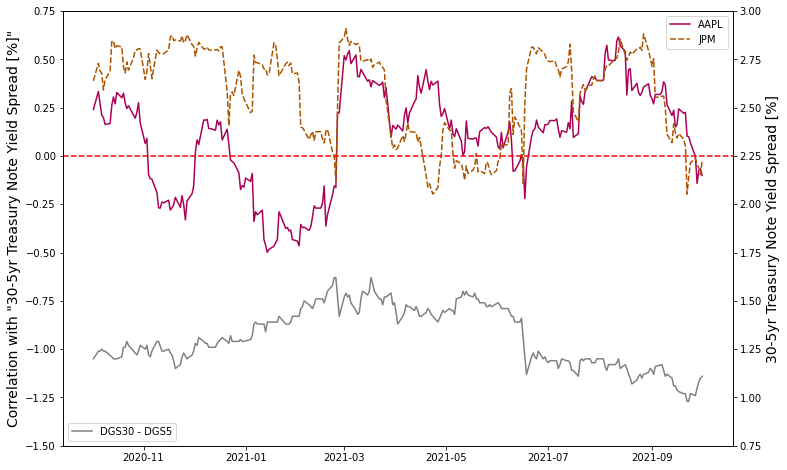

In [68]:
start_date = "2020-10-02"
end_date = "2021-10-02"

fig = plt.figure(figsize = (12,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

ax1 = sns.lineplot(data=df2[['AAPL', 'JPM']][start_date:end_date], palette='brg')
ax1.set_ylabel('Correlation with "30-5yr Treasury Note Yield Spread [%]"', fontsize = 14)
ax1.set_ylim(-1.50,0.75)
ax1.legend(loc='upper right')
plt.axhline(y = 0, color='r', linestyle='--')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df2[['DGS30 - DGS5']][start_date:end_date], palette='gray')
ax2.set_ylabel('30-5yr Treasury Note Yield Spread [%]', fontsize = 14)
ax2.set_ylim(0.75,3.00)
ax2.legend(loc='lower left')

## Calculate Correlation between "Stock Price" and "30-5yr Treasury Note Yield Spread"

In [51]:
df3 = pd.concat([Treasury_Note_10y_2y_spread['DGS10 - DGS2'], dow_price], axis = 1)
df3_corr = df3.pct_change()['DGS10 - DGS2'].rolling(window = 20, axis=0).corr(df3.pct_change().rolling(window = 20, axis=0))

In [52]:
df3_corr.dropna()

,DGS10 - DGS2,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2019-04-17,1.0,-0.184330,-0.210427,0.106670,0.194105,0.169601,-0.033473,0.112317,0.008528,-0.159984,...,0.034424,-0.039373,0.003292,-0.015811,0.004514,-0.300138,-0.082457,0.065839,-0.247905,-0.237230
2019-04-18,1.0,-0.091556,-0.153373,0.123139,0.173219,0.179002,0.026933,0.165463,0.044423,-0.198904,...,0.100420,0.048206,0.035888,0.030806,0.086200,-0.281482,-0.014475,0.105900,-0.226152,-0.224133
2019-04-19,1.0,-0.138215,-0.193632,0.116937,0.167541,0.185856,0.002647,0.177993,0.028290,-0.201331,...,0.092072,0.020341,-0.018113,0.013723,0.091527,-0.294693,-0.053823,0.159868,-0.233852,-0.253863
2019-04-22,1.0,0.146875,-0.269460,0.161694,-0.015018,0.084449,0.094357,0.264511,0.099947,-0.182544,...,0.060672,-0.043467,-0.107414,-0.032511,0.023911,-0.300493,0.000411,0.114142,-0.255930,-0.274456
2019-04-23,1.0,0.128059,-0.260751,0.143741,-0.013734,0.087597,0.078575,0.272229,0.106813,-0.180668,...,0.052048,-0.054915,-0.099948,0.020990,0.015000,-0.307527,0.011821,0.130840,-0.250676,-0.277515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,1.0,0.076646,0.444687,0.243570,-0.026832,0.460438,0.283754,0.317830,0.291500,-0.016631,...,-0.097323,-0.172116,-0.042091,0.123193,0.329946,0.280312,0.057775,-0.029595,0.413948,0.394205
2021-10-11,1.0,0.081603,0.508965,0.261806,-0.013473,0.472644,0.277808,0.327100,0.313978,-0.001023,...,-0.093853,-0.167264,-0.050572,0.140221,0.370357,0.345317,0.071264,0.031612,0.409303,0.388463
2021-10-12,1.0,0.074291,0.614445,0.169234,-0.026747,0.459861,0.208896,0.378850,0.228578,-0.056437,...,-0.105874,-0.094163,-0.156116,0.139161,0.254113,0.344962,0.055883,0.164232,0.321199,0.348004
2021-10-13,1.0,0.058255,0.450598,0.281081,-0.001642,0.421569,0.144015,0.310353,0.183254,-0.088660,...,-0.065334,-0.196948,-0.215869,0.105073,0.223799,0.288000,0.079777,0.102555,0.279431,0.367055


In [53]:
print(df3_corr.columns)

Index(['DGS10 - DGS2', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO',
       'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM',
       'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ',
       'WBA', 'WMT'],
      dtype='object')


In [54]:
df3_corr.drop(['DGS10 - DGS2'], axis = 1).dropna().tail()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2021-10-08,0.076646,0.444687,0.243570,-0.026832,0.460438,0.283754,0.317830,0.291500,-0.016631,0.212802,...,-0.097323,-0.172116,-0.042091,0.123193,0.329946,0.280312,0.057775,-0.029595,0.413948,0.394205
2021-10-11,0.081603,0.508965,0.261806,-0.013473,0.472644,0.277808,0.327100,0.313978,-0.001023,0.220762,...,-0.093853,-0.167264,-0.050572,0.140221,0.370357,0.345317,0.071264,0.031612,0.409303,0.388463
2021-10-12,0.074291,0.614445,0.169234,-0.026747,0.459861,0.208896,0.378850,0.228578,-0.056437,0.184695,...,-0.105874,-0.094163,-0.156116,0.139161,0.254113,0.344962,0.055883,0.164232,0.321199,0.348004
2021-10-13,0.058255,0.450598,0.281081,-0.001642,0.421569,0.144015,0.310353,0.183254,-0.088660,0.202129,...,-0.065334,-0.196948,-0.215869,0.105073,0.223799,0.288000,0.079777,0.102555,0.279431,0.367055
2021-10-14,0.042100,0.399267,0.271073,0.008653,0.379759,0.134763,0.278457,0.193615,-0.090651,0.183982,...,-0.056245,-0.197100,-0.216693,0.097164,0.228157,0.205075,0.072311,0.082698,0.140301,0.329158


In [55]:
df4 = pd.concat([Treasury_Note_10y_2y_spread['DGS10 - DGS2'], df3_corr.drop(['DGS10 - DGS2'], axis = 1)], axis = 1)
df4.dropna().tail()

,DGS10 - DGS2,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2021-10-06,1.23,-0.068545,0.498007,0.192317,-0.129032,0.419293,0.266602,0.178824,0.270353,-0.087881,...,-0.001597,-0.131441,-0.165540,0.146155,0.210397,0.096166,0.019439,0.152677,0.317843,0.367108
2021-10-07,1.26,-0.065388,0.372342,0.202346,-0.088095,0.448357,0.236528,0.243639,0.244703,-0.036952,...,-0.101616,-0.186453,-0.034601,0.143750,0.260431,0.145344,0.007913,-0.016248,0.326170,0.357936
2021-10-08,1.29,0.076646,0.444687,0.243570,-0.026832,0.460438,0.283754,0.317830,0.291500,-0.016631,...,-0.097323,-0.172116,-0.042091,0.123193,0.329946,0.280312,0.057775,-0.029595,0.413948,0.394205
2021-10-12,1.24,0.074291,0.614445,0.169234,-0.026747,0.459861,0.208896,0.378850,0.228578,-0.056437,...,-0.105874,-0.094163,-0.156116,0.139161,0.254113,0.344962,0.055883,0.164232,0.321199,0.348004
2021-10-13,1.19,0.058255,0.450598,0.281081,-0.001642,0.421569,0.144015,0.310353,0.183254,-0.088660,...,-0.065334,-0.196948,-0.215869,0.105073,0.223799,0.288000,0.079777,0.102555,0.279431,0.367055


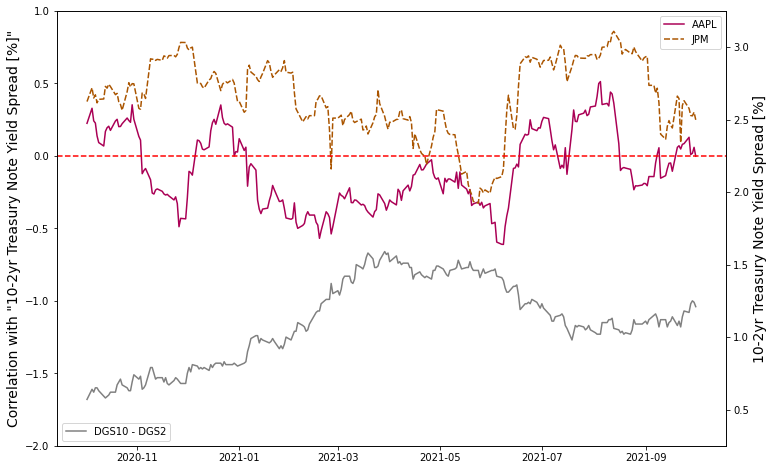

In [66]:
start_date = "2020-10-02"
end_date = "2021-10-02"

fig = plt.figure(figsize = (12,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

ax1 = sns.lineplot(data=df4[['AAPL', 'JPM']][start_date:end_date], palette='brg')
ax1.set_ylabel('Correlation with "10-2yr Treasury Note Yield Spread [%]"', fontsize = 14)
ax1.set_ylim(-2.00,1.00)
ax1.legend(loc='upper right')
plt.axhline(y = 0, color='r', linestyle='--')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df4[['DGS10 - DGS2']][start_date:end_date], palette='gray')
ax2.set_ylabel('10-2yr Treasury Note Yield Spread [%]', fontsize = 14)
ax2.set_ylim(0.25,3.25)
ax2.legend(loc='lower left')